In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap 
#import janitor
import warnings
warnings.filterwarnings('ignore')

In [152]:
df = pd.read_csv('datasets/test.csv')

In [153]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [154]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
49995,0x25fe5,CUS_0x8600,December,Sarah McBridec,4975,031-35-0942,Architect,20002.88,1929.906667,10,...,12.0,_,3571.7,34.780553,NaN,Yes,60.964772,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,0x25fee,CUS_0x942c,September,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,27.758522,31 Years and 11 Months,NM,35.104023,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,0x25fef,CUS_0x942c,October,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,Good,502.38,36.858542,32 Years and 0 Months,No,35.104023,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,0x25ff0,CUS_0x942c,November,Nicks,25,078-73-5990,Mechanic,39628.99,NaN,4,...,7.0,Good,502.38,39.139840,32 Years and 1 Months,No,35.104023,97.59857973344877,High_spent_Small_value_payments,463.23898098947717
49999,0x25ff1,CUS_0x942c,December,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,7.0,_,502.38,34.108530,32 Years and 2 Months,No,35.104023,220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847


In [155]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [157]:
df.nunique()

ID                          50000
Customer_ID                 12500
Month                           4
Name                        10139
Age                           976
SSN                         12501
Occupation                     16
Annual_Income               16121
Monthly_Inhand_Salary       12793
Num_Bank_Accounts             540
Num_Credit_Card               819
Interest_Rate                 945
Num_of_Loan                   263
Type_of_Loan                 6260
Delay_from_due_date            73
Num_of_Delayed_Payment        443
Changed_Credit_Limit         3927
Num_Credit_Inquiries          750
Credit_Mix                      4
Outstanding_Debt            12685
Credit_Utilization_Ratio    50000
Credit_History_Age            399
Payment_of_Min_Amount           3
Total_EMI_per_month         13144
Amount_invested_monthly     45450
Payment_Behaviour               7
Monthly_Balance             49433
dtype: int64

In [158]:
df.shape

(50000, 27)

In [159]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

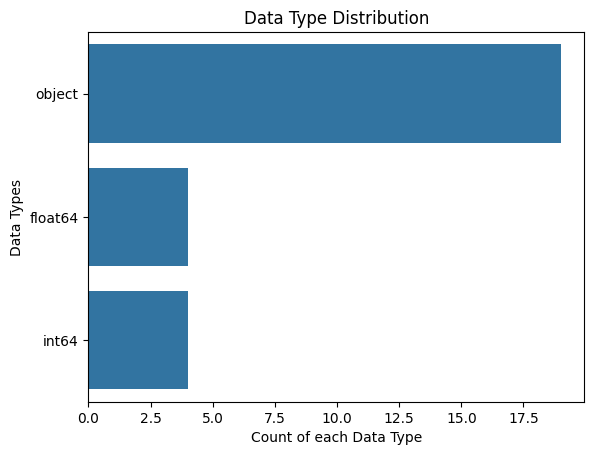

In [160]:
sns.countplot(y=df.dtypes, data=df)
plt.title('Data Type Distribution')
plt.xlabel('Count of each Data Type')
plt.ylabel('Data Types')
plt.show()

In [161]:
df.duplicated().sum()

np.int64(0)

In [162]:
df.dropna(axis=0, inplace=True)

In [163]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [164]:
df.shape

(26459, 27)

In [165]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [166]:
df = df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', 'Month', 'Type_of_Loan'])

df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,1824.843333,3,4,3,4,3,9,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
4,28,_______,34847.84,3037.986667,2,4,6,1,3,1,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,28,Teacher,34847.84,3037.986667,2,4,6,1,3,3,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
7,28,Teacher,34847.84,3037.986667,2,4,6,1,3,2_,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783


In [167]:
df.Payment_Behaviour.value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      6694
High_spent_Medium_value_payments    4657
High_spent_Large_value_payments     3618
Low_spent_Medium_value_payments     3615
High_spent_Small_value_payments     3045
Low_spent_Large_value_payments      2794
!@9#%8                              2036
Name: count, dtype: int64

In [168]:
df.Payment_Behaviour.replace({'!@9#%8': 'Undetermined'})

0          Low_spent_Small_value_payments
1        High_spent_Medium_value_payments
4         High_spent_Large_value_payments
5          Low_spent_Large_value_payments
7                            Undetermined
                       ...               
49992      Low_spent_Small_value_payments
49993      Low_spent_Small_value_payments
49994     High_spent_Small_value_payments
49997      Low_spent_Large_value_payments
49999     Low_spent_Medium_value_payments
Name: Payment_Behaviour, Length: 26459, dtype: object

In [169]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,1824.843333,3,4,3,4,3,9,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
4,28,_______,34847.84,3037.986667,2,4,6,1,3,1,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,28,Teacher,34847.84,3037.986667,2,4,6,1,3,3,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
7,28,Teacher,34847.84,3037.986667,2,4,6,1,3,2_,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783


In [170]:
df.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Mechanic',
       'Writer', 'Accountant', 'Architect', 'Manager', 'Musician',
       'Developer'], dtype=object)

In [171]:
df.Occupation.value_counts()

Occupation
_______          1851
Lawyer           1753
Engineer         1738
Scientist        1696
Architect        1691
Doctor           1665
Mechanic         1661
Developer        1661
Teacher          1655
Accountant       1648
Entrepreneur     1643
Media_Manager    1640
Writer           1588
Manager          1548
Journalist       1546
Musician         1475
Name: count, dtype: int64

In [172]:
df.Occupation.replace({'_______': 'Other'})

0        Scientist
1        Scientist
4            Other
5          Teacher
7          Teacher
           ...    
49992    Architect
49993    Architect
49994        Other
49997     Mechanic
49999     Mechanic
Name: Occupation, Length: 26459, dtype: object

In [173]:
df.Occupation.value_counts()

Occupation
_______          1851
Lawyer           1753
Engineer         1738
Scientist        1696
Architect        1691
Doctor           1665
Mechanic         1661
Developer        1661
Teacher          1655
Accountant       1648
Entrepreneur     1643
Media_Manager    1640
Writer           1588
Manager          1548
Journalist       1546
Musician         1475
Name: count, dtype: int64

In [174]:
df.shape

(26459, 21)

In [175]:
df.dtypes

Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

In [176]:
df.Credit_Mix.unique()

array(['Good', '_', 'Standard', 'Bad'], dtype=object)

In [177]:
df.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [178]:
strip_columns = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance']

In [179]:
df[strip_columns] = df[strip_columns].replace(r'[^0-9.]', '', regex=True)

In [180]:
obj_columns = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Amount_invested_monthly', 'Monthly_Balance']

df[obj_columns] = df[obj_columns].apply(pd.to_numeric, errors='coerce')

In [181]:
df.dtypes

Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object

In [182]:
df.isna().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit          577
Num_Credit_Inquiries            0
Credit_Mix                  26459
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount       26459
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
dtype: int64

In [183]:
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,2022.0,NaN,809.98,35.030402,229,NaN,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,24,Scientist,19114.12,1824.843333,3,4,3,4,3,9,...,4.0,NaN,809.98,33.053114,2210,NaN,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
4,28,_______,34847.84,3037.986667,2,4,6,1,3,1,...,5.0,NaN,605.03,25.926822,273,NaN,18.816215,39.684018,High_spent_Large_value_payments,485.298434
5,28,Teacher,34847.84,3037.986667,2,4,6,1,3,3,...,5.0,NaN,605.03,30.116600,274,NaN,18.816215,251.627369,Low_spent_Large_value_payments,303.355083
7,28,Teacher,34847.84,3037.986667,2,4,6,1,3,2,...,5.0,NaN,605.03,33.875167,276,NaN,18.816215,153.534488,!@9#%8,421.447964


In [184]:
df = df.drop(columns=['Occupation'])

df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,2022.0,NaN,809.98,35.030402,229,NaN,49.574949,236.642682,Low_spent_Small_value_payments,186.266702
1,24,19114.12,1824.843333,3,4,3,4,3,9,13.27,4.0,NaN,809.98,33.053114,2210,NaN,49.574949,21.465380,High_spent_Medium_value_payments,361.444004
4,28,34847.84,3037.986667,2,4,6,1,3,1,5.42,5.0,NaN,605.03,25.926822,273,NaN,18.816215,39.684018,High_spent_Large_value_payments,485.298434
5,28,34847.84,3037.986667,2,4,6,1,3,3,5.42,5.0,NaN,605.03,30.116600,274,NaN,18.816215,251.627369,Low_spent_Large_value_payments,303.355083
7,28,34847.84,3037.986667,2,4,6,1,3,2,7.42,5.0,NaN,605.03,33.875167,276,NaN,18.816215,153.534488,!@9#%8,421.447964


In [185]:
df.dtypes

Age                           int64
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                  float64
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount       float64
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
dtype: object